In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [2]:
#Medias Iteradas

In [3]:
#df = pd.read_csv('Database/CovidSample.csv') #separador mal seleccionado
df = pd.read_csv('Database/CovidSample.csv', sep=';')

In [4]:
df

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,2020-05-29,2020-05-31,Bogotá,Kennedy,32,1,F,Relacionado,Casa,Recuperado
9995,9996,2020-05-28,2020-05-31,Bogotá,Usaquén,70,1,F,En estudio,Casa,Recuperado
9996,9997,2020-05-27,2020-05-31,Bogotá,Suba,32,1,F,Relacionado,Casa,Recuperado
9997,9998,2020-05-27,2020-05-31,Bogotá,Suba,2,1,M,Relacionado,Casa,Recuperado


<Axes: xlabel='EDAD', ylabel='LOCALIDAD_ASIS'>

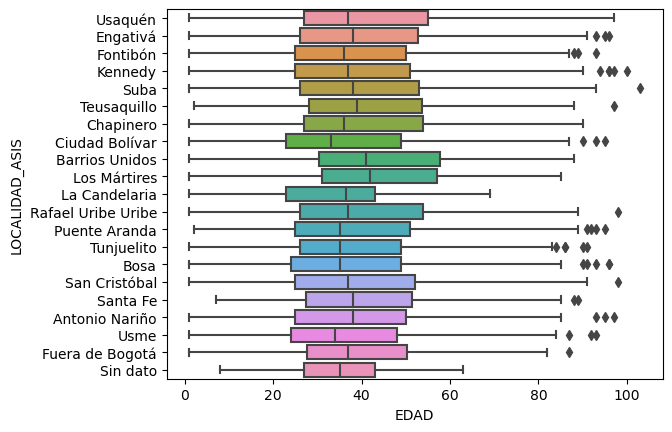

In [5]:
sns.boxplot(x='EDAD',y='LOCALIDAD_ASIS', data=df)

<Axes: xlabel='EDAD', ylabel='SEXO'>

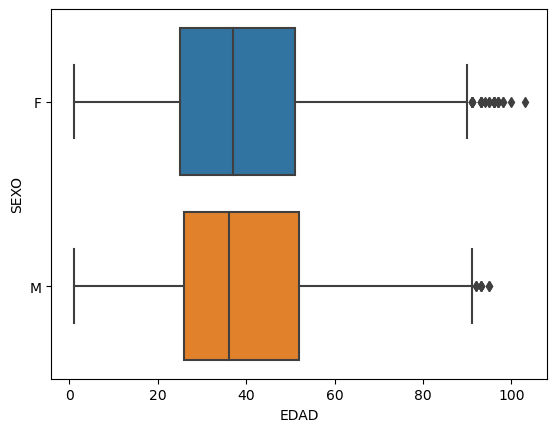

In [6]:
sns.boxplot(x='EDAD',y='SEXO', data=df)

In [7]:
df.describe() #variables numericas

,CASO,EDAD,UNI_MED
count,9999.000000,9999.000000,9999.000000
mean,5000.000000,38.730573,1.009101
std,2886.607005,18.495692,0.101090
min,1.000000,1.000000,1.000000
25%,2500.500000,26.000000,1.000000
50%,5000.000000,37.000000,1.000000
75%,7499.500000,51.000000,1.000000
max,9999.000000,103.000000,3.000000


In [8]:
df.info() #valores no asignados para hacer limpieza (los mas pequeños contra el total)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CASO                         9999 non-null   int64 
 1   FECHA_DE_INICIO_DE_SINTOMAS  9833 non-null   object
 2   FECHA_DIAGNOSTICO            9999 non-null   object
 3   CIUDAD                       9999 non-null   object
 4   LOCALIDAD_ASIS               9999 non-null   object
 5   EDAD                         9999 non-null   int64 
 6   UNI_MED                      9999 non-null   int64 
 7   SEXO                         9999 non-null   object
 8   FUENTE_O_TIPO_DE_CONTAGIO    9999 non-null   object
 9   UBICACION                    9999 non-null   object
 10  ESTADO                       9999 non-null   object
dtypes: int64(3), object(8)
memory usage: 859.4+ KB


In [9]:
#N = df.value_counts(df.CASO) #Contar para dar caraterizacion

In [10]:
#Para obtener el valor total usamos shape
N = df.shape[0] #Poblacion

In [11]:
df.head(10) #ver los primeros 10 registros

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
5,6,2020-03-08,2020-03-13,Bogotá,Suba,61,1,F,Importado,Casa,Recuperado
6,7,2020-02-28,2020-03-13,Bogotá,Teusaquillo,73,1,F,Importado,Casa,Recuperado
7,8,2020-03-06,2020-03-13,Bogotá,Chapinero,54,1,M,Importado,Casa,Recuperado
8,9,2020-03-10,2020-03-13,Bogotá,Engativá,54,1,F,Relacionado,Casa,Recuperado
9,10,2020-03-08,2020-03-14,Bogotá,Fontibón,23,1,M,Relacionado,Casa,Recuperado


In [12]:
# Limpieza de datos (Dejar solo las mujeres) con condiciones
# Usamos mascaras

In [13]:
maskF = df['SEXO'] == 'F' # Columna == VALOR CONDICIONAL
maskF # responde a la condicion aplicada

0        True
1        True
2        True
3        True
4        True
        ...  
9994     True
9995     True
9996     True
9997    False
9998     True
Name: SEXO, Length: 9999, dtype: bool

In [14]:
df1 = df[maskF]

In [15]:
df1

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2020-05-28,2020-05-31,Bogotá,Puente Aranda,22,1,F,Relacionado,Casa,Recuperado
9994,9995,2020-05-29,2020-05-31,Bogotá,Kennedy,32,1,F,Relacionado,Casa,Recuperado
9995,9996,2020-05-28,2020-05-31,Bogotá,Usaquén,70,1,F,En estudio,Casa,Recuperado
9996,9997,2020-05-27,2020-05-31,Bogotá,Suba,32,1,F,Relacionado,Casa,Recuperado


In [16]:
# calcular la probabilidad que sea mujer
NF = df1.shape[0]

In [17]:
PF = NF/N
PF 

0.4821482148214821

In [18]:
maskM = df['SEXO'] == 'M'
maskM

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997     True
9998    False
Name: SEXO, Length: 9999, dtype: bool

In [19]:
df2 = df[maskM]

In [20]:
NM = df2.shape[0]
NM

5178

In [21]:
PM = NM/N 

In [22]:
print(f"P(MujerAfectada): ", PF, f"\nP(HombreAfectado): " , PM , f"\nP(Total):", PF+PM)

P(MujerAfectada):  0.4821482148214821 
P(HombreAfectado):  0.5178517851785178 
P(Total): 1.0


In [23]:
#En caso que tenga diferente probablidad requiere tomar mas valores de un lado que del otro (mas hombres que mujeres para poder hacer inferencias)

In [24]:
#Filtro para Fallecidos
maskFallecidos = df['ESTADO'] == 'Fallecido'

In [25]:
df3 = df[ maskF & maskFallecidos ] # Mujeres y Fallecidos

In [26]:
#Tabla de contingencia para relacionar dos variables

# Tabla de contingencia

In [27]:
CrossEdadF = pd.crosstab( index = df3['EDAD'], columns = df3['ESTADO'])
print("EstratoF : ", CrossEdadF.shape[0])

EstratoF :  52


<Axes: xlabel='EDAD'>

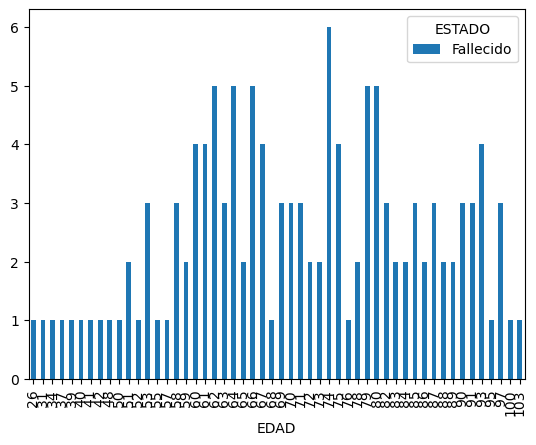

In [28]:
CrossEdadF.plot(kind="bar")

In [29]:
#caso 1 : Edad media de fallecimientos de F
#caso 2 : Probabildiad de fallecimientos de F


In [30]:
#1 Calculamos el promedio ponderado
#Esperanza de la variable

$$ E(x) = \sum_{i=1}^{n} p(x)x $$

In [31]:
#Media aritmetcia p(x)/n

In [32]:
EdadF = np.array(CrossEdadF.index) # selecciono un array con los indices de la tabla de contingencia

In [33]:
Proporcion_F_Fallecida = np.array(CrossEdadF.Fallecido)

In [34]:
#Frecuencia relativa = Fabs/N -< infty P(a)
PFallecimientoF = Proporcion_F_Fallecida/np.sum(Proporcion_F_Fallecida)
#Pesos de ponderacion de la media
PFallecimientoF

array([0.00787402, 0.00787402, 0.00787402, 0.00787402, 0.00787402,
       0.00787402, 0.00787402, 0.00787402, 0.00787402, 0.00787402,
       0.01574803, 0.00787402, 0.02362205, 0.00787402, 0.00787402,
       0.02362205, 0.01574803, 0.03149606, 0.03149606, 0.03937008,
       0.02362205, 0.03937008, 0.01574803, 0.03937008, 0.03149606,
       0.00787402, 0.02362205, 0.02362205, 0.02362205, 0.01574803,
       0.01574803, 0.04724409, 0.03149606, 0.00787402, 0.01574803,
       0.03937008, 0.03937008, 0.02362205, 0.01574803, 0.01574803,
       0.02362205, 0.01574803, 0.02362205, 0.01574803, 0.01574803,
       0.02362205, 0.02362205, 0.03149606, 0.00787402, 0.02362205,
       0.00787402, 0.00787402])

In [35]:
meanF = np.sum(EdadF*PFallecimientoF)
meanF

71.03149606299213

In [56]:
dF_HFall = df[ maskM & maskFallecidos ] # Hombre y Fallecidos

In [65]:
CrossEdadM = pd.crosstab( index = dF_HFall['EDAD'], columns = dF_HFall['ESTADO'])

In [68]:
EdadM = np.array(CrossEdadM.index)#Casos posibles de muerte para los hombre
#EdadM

In [69]:
fabs_MFall = np.array(CrossEdadM.Fallecido)  #Frecuencia Absoluta Masculo Fallecido

In [81]:
#Frecuencia relativa = Fabs/N -> infty P(a)
frel_MFall = fabs_MFall/np.sum(fabs_MFall)  # Frecuencia Relativa Masculino Fallecido

In [71]:
meanM = np.sum(EdadM*frel_MFall)
meanM

65.75609756097562

# Graficacion

<Axes: xlabel='EDAD', ylabel='Fallecido'>

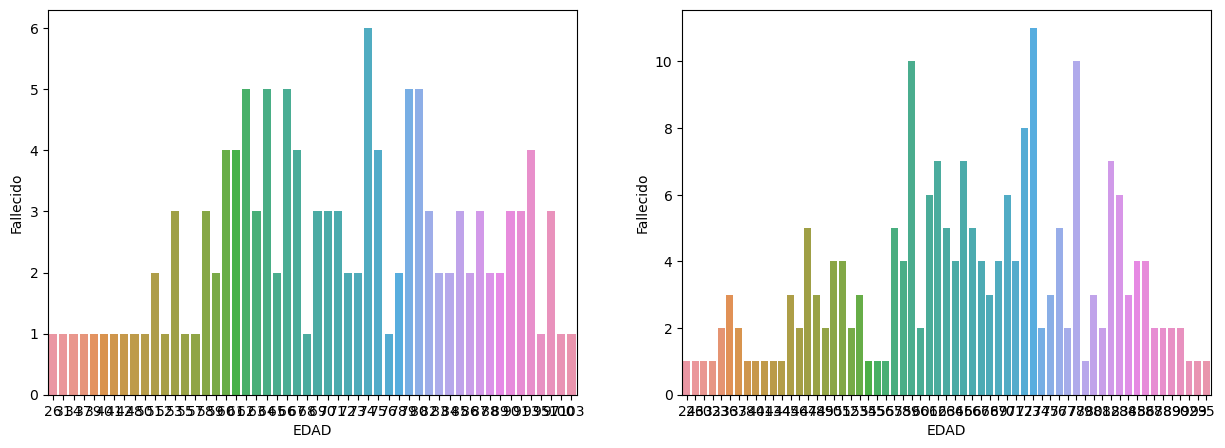

In [72]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=CrossEdadF.index, y='Fallecido', data=CrossEdadF,ax=ax[0])
sns.barplot(x=CrossEdadM.index, y='Fallecido', data=CrossEdadM,ax=ax[1])

In [73]:
df2 = df[maskFallecidos]

<Axes: xlabel='EDAD', ylabel='SEXO'>

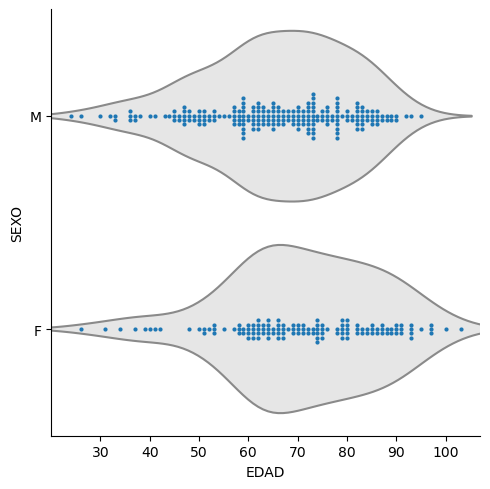

In [74]:
sns.catplot( x = 'EDAD', y = 'SEXO', data = df2, kind='violin',color='.9', inner=None)
sns.swarmplot( x = 'EDAD', y = 'SEXO', data = df2, size=3 )

# Valor medio muestral para datos agrupados

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{k} f_{i} x_{i} $$

donde $n$

$$ n = \sum_{i=1}^{k} f_{i} $$

# Varianza muestral para datos agrupados

$$ s^{2} = \frac{ \sum_{i=1}^{k} f_{i} (x_{i}-\bar{x})^{2} }{n-1}  $$


# Varianza poblacional para datos agrupados

$$ \sigma^{2} = \frac{ \sum_{i=1}^{k} f_{i} (x_{i}-\mu)^{2} }{n}  $$

In [75]:
#Varianza de la distribucion de edad para Masculino

## Calcular la varianza de la edad en hombres y mujeres de los valores AGRUPADOS

$$ s^{2} = \frac{ \sum_{i=1}^{k} f_{i} (x_{i}-\bar{x})^{2} }{n-1}  $$

In [84]:
dif_F = (EdadF-meanF)**2  
s2F = np.sum(PFallecimientoF*dif_F) # Frecuencia de aparicion de Xi (Varianza)
stdF = np.sqrt(s2F) #Desviacion Estandar 

dif_M = (EdadM-meanM)**2
s2M = np.sum(frel_MFall*dif_M)  # Frecuencia de aparicion de Xi (Varianza)
stdM = np.sqrt(s2M)

In [87]:
print("Desviacion estandar :", f"\nMujeres:",stdF,f"\nHombres:", stdM)

Desviacion estandar : 
Mujeres: 15.349439964070822 
Hombres: 14.710839686542872
